In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm, norm
import scipy.stats as ss

In [ ]:
def bs_call_price(S, r, sigma, t, T, K):
    ttm = T - t

    if ttm < 0:
        return 0.0
    elif ttm == 0.0:
        return np.maximum(S - K, 0.0)

    vol = sigma * np.sqrt(ttm)

    d_minus = np.log(S / K) + (r - 0.5 * sigma**2) * ttm
    d_minus /= vol

    d_plus = d_minus + vol

    res = S * norm.cdf(d_plus)
    res -= K * np.exp(-r * ttm) * norm.cdf(d_minus)

    return res

In [ ]:
def option_price_greeks(S, r, vol, T, K, option_type):
    # Compute d1 and d2
    d1 = (np.log(S / K) + (r + 0.5 * vol**2) * T) / (vol * np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    if option_type in ["C", "P"]:
        if option_type in ["C"]:
            Opt_Price = S * ss.norm.cdf(d1) - K * np.exp(-r * T) * ss.norm.cdf(d2)
            Delta = ss.norm.cdf(d1)
            Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
            Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
            Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) - r * K * np.exp(
                -r * T
            ) * ss.norm.cdf(d2)
            Rho = K * T * np.exp(-r * T) * ss.norm.cdf(d2)
        else:
            Opt_Price = K * np.exp(-r * T) * ss.norm.cdf(-d2) - S * ss.norm.cdf(-d1)
            Delta = -ss.norm.cdf(-d1)
            Gamma = ss.norm.pdf(d1) / (S * vol * np.sqrt(T))
            Vega = S * ss.norm.pdf(d1) * np.sqrt(T)
            Theta = -(S * ss.norm.pdf(d1) * vol) / (2 * np.sqrt(T)) + r * K * np.exp(
                -r * T
            ) * ss.norm.cdf(-d2)
            Rho = -K * T * np.exp(-r * T) * ss.norm.cdf(-d2)
    else:
        Opt_Price = "Error: option type incorrect. Choose P for a put option or C for a call option."

    print(f"Option price = {Opt_Price:.2f}")
    print(f"Delta = {Delta:.4f}")
    print(f"Gamma = {Gamma:.4f}")
    print(f"Vega = {Vega:.4f}")
    print(f"Theta = {Theta:.4f}")
    print(f"Rho = {Rho:.4f}")

In [ ]:
option_price_greeks(100, 0.05, 0.20, 3/12, 100, "C")

Option price = 4.61
Delta = 0.5695
Gamma = 0.0393
Vega = 19.6440
Theta = -10.4742
Rho = 13.0828


In [ ]:
option_price_greeks(100, 0.05, 0.20, 3/12, 100, "P")

Option price = 3.37
Delta = -0.4305
Gamma = 0.0393
Vega = 19.6440
Theta = -5.5363
Rho = -11.6067


In [ ]:
option_price_greeks(100, 0.05, 0.25, 3/12, 100, "C")

Option price = 5.60
Delta = 0.5645
Gamma = 0.0315
Vega = 19.6855
Theta = -12.3855
Rho = 12.7140


In [ ]:
option_price_greeks(100, 0.05, 0.25, 3/12, 100, "P")

Option price = 4.36
Delta = -0.4355
Gamma = 0.0315
Vega = 19.6855
Theta = -7.4477
Rho = -11.9754


In [3]:
def bs_call_mc(S, K, r, sigma, T, N, M):
    dt = T / N
    dS = S * (r * dt + sigma * np.sqrt(dt) * np.random.randn(M, N))
    S = S + np.cumsum(dS, axis=1)
    ST = S[:, -1]
    data = ST - K

    average = np.sum(np.maximum(data, 0)) / float(M)

    return np.exp(-r * T) * average

In [ ]:
def bs_put_mc(S, K, r, sigma, T, N, M):
    dt = T / N
    dS = S * (r * dt + sigma * np.sqrt(dt) * np.random.randn(M, N))
    S = S + np.cumsum(dS, axis=1)
    ST = S[:, -1]
    data = K - ST

    average = np.sum(np.maximum(data, 0)) / float(M)

    return np.exp(-r * T) * average

In [ ]:
np.random.seed(42)
print(f"The MC price of a call is {bs_call_mc(100, 100, 0.05, 0.20, 3/12, 90, 3000):.2f}")

The MC price of a call is 4.54


In [ ]:
np.random.seed(42)
print(f"The MC price of a put is {bs_put_mc(100, 100, 0.05, 0.20, 3/12, 90, 3000):.2f}")

The MC price of a put is 3.33


In [ ]:
def delta_call_mc(S, K, r, sigma, T, N, M):
  np.random.seed(42)
  price1 = bs_call_mc(S, K, r, sigma, T, N, M)
  np.random.seed(42)
  price2 = bs_call_mc(S+0.01, K, r, sigma, T, N, M)
  return (price2 - price1) / (0.01)

In [ ]:
print(f"The delta of a call is {delta_call_mc(100, 100, 0.05, 0.20, 3/12, 90, 3000):.4f}")

The delta of a call is 0.5843


In [ ]:
def delta_put_mc(S, K, r, sigma, T, N, M):
  np.random.seed(42)
  price1 = bs_put_mc(S, K, r, sigma, T, N, M)
  np.random.seed(42)
  price2 = bs_put_mc(S+0.01, K, r, sigma, T, N, M)
  return (price2 - price1) / (0.01)

In [ ]:
print(f"The delta of a put is {delta_put_mc(100, 100, 0.05, 0.20, 3/12, 90, 3000):.4f}")

The delta of a put is -0.4154


In [ ]:
def vega_call_mc(S, K, r, sigma, T, N, M):
  np.random.seed(42)
  price1 = bs_call_mc(S, K, r, sigma, T, N, M)
  np.random.seed(42)
  price2 = bs_call_mc(S, K, r, sigma+1e-4, T, N, M)
  return (price2 - price1) / (1e-4)

In [ ]:
print(f"The vega for a call is: {vega_call_mc(100, 100, 0.05, 0.20, 3/12, 90, 3000):.4f}")

The vega for a call is: 19.4323


In [ ]:
def vega_put_mc(S, K, r, sigma, T, N, M):
  np.random.seed(42)
  price1 = bs_put_mc(S, K, r, sigma, T, N, M)
  np.random.seed(42)
  price2 = bs_put_mc(S, K, r, sigma+1e-4, T, N, M)
  return (price2 - price1) / (1e-4)

In [ ]:
print(f"The vega for a put is: {vega_put_mc(100, 100, 0.05, 0.20, 3/12, 90, 3000):.4f}")

The vega for a put is: 19.4323


In [ ]:
np.random.seed(42)
print(f"The MC price of a call at 25% volatility is {bs_call_mc(100, 100, 0.05, 0.25, 3/12, 90, 3000):.2f}")

The MC price of a call at 25% volatility is 5.51


In [ ]:
np.random.seed(42)
print(f"The MC price of a put at 25% volatility is {bs_put_mc(100, 100, 0.05, 0.25, 3/12, 90, 3000):.2f}")

The MC price of a put at 25% volatility is 4.30


In [ ]:
bond_price = 100 * np.exp(-(3/12) * 0.05)
print(f"The price of a zero-coupon risk-free bond is for $100, maturing in 3 months is: {bond_price:.2f}")

The price of a zero-coupon risk-free bond is for $100, maturing in 3 months is: 98.76


In [ ]:
print ("Call plus bond = ", 4.61 + 98.76)

Call plus bond =  103.37


In [ ]:
print ("Put plus stock = ", 3.37 + 100)

Put plus stock =  103.37


In [ ]:
print ("Call plus bond (25% vol) = ", 5.60 + 98.76)
print ("Put plus stock (25% vol) = ", 4.36 + 100)

Call plus bond (25% vol) =  104.36
Put plus stock (25% vol) =  104.36


For a European-style option, we have put-call parity using the Black-Scholes method. This holds at both the 20% and 25% volatility levels.

If we look at the Greeks we also see that the delta of a call minus the delta of a put is 1.

In [ ]:
print (f"Call plus bond {4.54247 + bond_price:.2f}")
print (f"Put plus stock {3.3256 + 100:.2f}")

Call plus bond 103.30
Put plus stock 103.33


For a European style option, we have put-call parity using the Black-Scholes method; there is a 3 cent difference in the values based on our simulation. The 3 cent difference between call and put prices resulting from Monte Carlo simulations could be attributed to statistical noise or approximation errors inherent in the method. The magnitude of the difference may vary based on factors such as the number of simulations, the underlying asset's volatility, and the specific parameters of the options being priced.  Although a 3 cent difference might seem significant, in practice, it may not be large enough to create a viable arbitrage opportunity, when considering trading costs and market frictions.

In [ ]:
print (f"Call plus bond (25% vol) = { 5.51 + bond_price:.2f}")
print (f"Put plus stock (25% vol) = { 4.30 + 100:.2f}")

Call plus bond (25% vol) = 104.27
Put plus stock (25% vol) = 104.30


If we look at the prices at the 25% volatility level, we again have put-call parity (within 3 cents) using the Monte Carlo method.

In addition, if look at the deltas for the call and put we get that the delta of the call minus the delta of the put is 1.0 using the Monte Carlo method.

In [ ]:
for liter in range(3, 7):
  print(f"The MC price of a call is {bs_call_mc(100, 100, 0.05, 0.20, 3/12, 90, 10**liter):.2f} for {10**liter} iterations")

The MC price of a call is 4.53 for 1000 iterations
The MC price of a call is 4.58 for 10000 iterations
The MC price of a call is 4.57 for 100000 iterations
The MC price of a call is 4.59 for 1000000 iterations


In [ ]:
for liter in range(3, 7):
  print(f"The MC price of a put is {bs_put_mc(100, 100, 0.05, 0.20, 3/12, 90, 10**liter):.2f} for {10**liter} iterations")

The MC price of a put is 2.93 for 1000 iterations
The MC price of a put is 3.43 for 10000 iterations
The MC price of a put is 3.34 for 100000 iterations
The MC price of a put is 3.35 for 1000000 iterations


The Monte-Carlo price and Black Scholes price for a European call and put are close to each other.  If we try with varying number of iterations we can see that the Monte Carlo price appears to be converging to the Black-Scholes price.


In [ ]:
import numpy as np

def bs_call_mc_american(S, K, r, sigma, T, N, M):
    dt = T / N
    dS = S * (r * dt + sigma * np.sqrt(dt) * np.random.randn(M, N))
    S = S + np.cumsum(dS, axis=1)
    ST = S[:, -1]
    data = np.maximum(ST - K, 0)

    for t in range(N - 2, -1, -1):
        intrinsic = np.maximum(ST - K, 0)
        X = S[:, t]
        Y = np.exp(-r * dt) * data

        # Polynomial regression to estimate the conditional expectation
        cashflows = np.polyfit(X, Y, 5)
        continuation = np.polyval(cashflows, X)

        # Compare the intrinsic value with the continuation value
        exercise = intrinsic > continuation
        data = np.where(exercise, intrinsic, data)

    average = np.sum(data) / float(M)

    return np.exp(-r * T) * average

In [ ]:
np.random.seed(42)
print(f"The Monte Carlo price for an American ATM Call option is: {bs_call_mc_american(100, 100, 0.05, 0.20, 3/12, 90, 5000):.2f}")

The Monte Carlo price for an American ATM Call option is: 4.60


In [ ]:
def bs_put_mc_american(S, K, r, sigma, T, N, M):
    dt = T / N
    dS = S * (r * dt + sigma * np.sqrt(dt) * np.random.randn(M, N))
    S = S + np.cumsum(dS, axis=1)
    ST = S[:, -1]
    data = np.maximum(K - ST, 0)

    for t in range(N - 2, -1, -1):
        intrinsic = np.maximum(K - ST, 0)
        X = S[:, t]
        Y = np.exp(-r * dt) * data

        # Polynomial regression to estimate the conditional expectation
        cashflows = np.polyfit(X, Y, 5)
        continuation = np.polyval(cashflows, X)

        # Compare the intrinsic value with the continuation value
        exercise = intrinsic > continuation
        data = np.where(exercise, intrinsic, data)

    average = np.sum(data) / float(M)

    return np.exp(-r * T) * average


In [ ]:
np.random.seed(42)
print(f"The Monte Carlo price for an American ATM Put option is: {bs_put_mc_american(100, 100, 0.05, 0.20, 3/12, 90, 5000):.2f}")

The Monte Carlo price for an American ATM Put option is: 3.41


In [ ]:
def delta_call_mc_american(S, K, r, sigma, T, N, M):
  np.random.seed(42)
  price1 = bs_call_mc_american(S, K, r, sigma, T, N, M)
  np.random.seed(42)
  price2 = bs_call_mc_american(S+0.01, K, r, sigma, T, N, M)
  return (price2 - price1) / (0.01)

In [ ]:
print(f"The delta for an American ATM call option is {delta_call_mc_american(100, 100, 0.05, 0.20, 3/12, 90, 5000):.4f}")

The delta for an American ATM call option is 0.5863


In [ ]:
def delta_put_mc_american(S, K, r, sigma, T, N, M):
  np.random.seed(42)
  price1 = bs_put_mc_american(S, K, r, sigma, T, N, M)
  np.random.seed(42)
  price2 = bs_put_mc_american(S+0.01, K, r, sigma, T, N, M)
  return (price2 - price1) / (0.01)

In [ ]:
print(f"The delta for an American ATM put option is {delta_put_mc_american(100, 100, 0.05, 0.20, 3/12, 90, 5000):.4f}")

The delta for an American ATM put option is -0.4131


In [ ]:
def vega_call_mc_american(S, K, r, sigma, T, N, M):
  np.random.seed(42)
  price1 = bs_call_mc_american(S, K, r, sigma, T, N, M)
  np.random.seed(42)
  price2 = bs_call_mc_american(S, K, r, sigma+1e-4, T, N, M)
  return (price2 - price1) / (1e-4)

In [ ]:
def vega_put_mc_american(S, K, r, sigma, T, N, M):
  np.random.seed(42)
  price1 = bs_put_mc_american(S, K, r, sigma, T, N, M)
  np.random.seed(42)
  price2 = bs_put_mc_american(S, K, r, sigma+1e-4, T, N, M)
  return (price2 - price1) / (1e-4)

In [ ]:
print(f"The vega for a call is: {vega_call_mc_american(100, 100, 0.05, 0.20, 3/12, 90, 3000):.4f}")

The vega for a call is: 19.3443


In [ ]:
print(f"The vega for a put is: {vega_put_mc_american(100, 100, 0.05, 0.20, 3/12, 90, 3000):.4f}")

The vega for a put is: 19.4323


In [ ]:
sp = [90, 95, 100, 105, 110]
print("Stock Price\tCall Price")
call_prices = []
for price in sp:
  np.random.seed(42)
  cp = bs_call_mc_american(price, 100, 0.05, 0.20, 3/12, 90, 5000)
  call_prices.append(cp)
  print(f"{price}\t\t{cp:.2f}")

Stock Price	Call Price
90		0.76
95		2.18
100		4.60
105		7.98
110		12.07


Text(0.5, 1.0, 'American Call option (100 strike) prices for various stock prices')

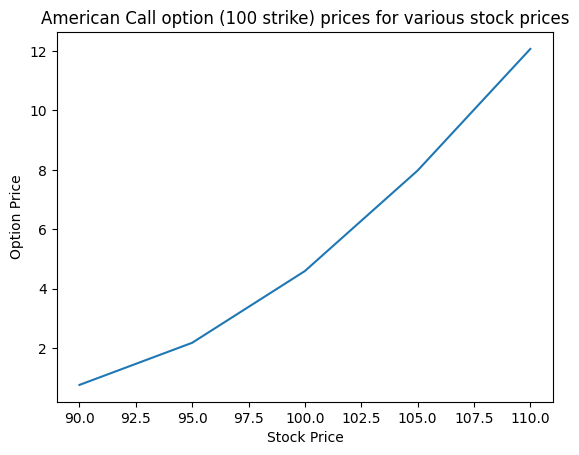

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(sp, call_prices)
plt.xlabel("Stock Price")
plt.ylabel("Option Price")
plt.title("American Call option (100 strike) prices for various stock prices")

In [ ]:
sp = [90, 95, 100, 105, 110]
print("Stock Price\tPut Price")
put_prices = []
for price in sp:
  np.random.seed(42)
  pp = bs_put_mc_american(price, 100, 0.05, 0.20, 3/12, 90, 5000)
  put_prices.append(pp)
  print(f"{price}\t\t{pp:.2f}")

Stock Price	Put Price
90		9.57
95		5.99
100		3.41
105		1.80
110		0.89


Text(0.5, 1.0, 'American Put option (100 strike) prices for various stock prices')

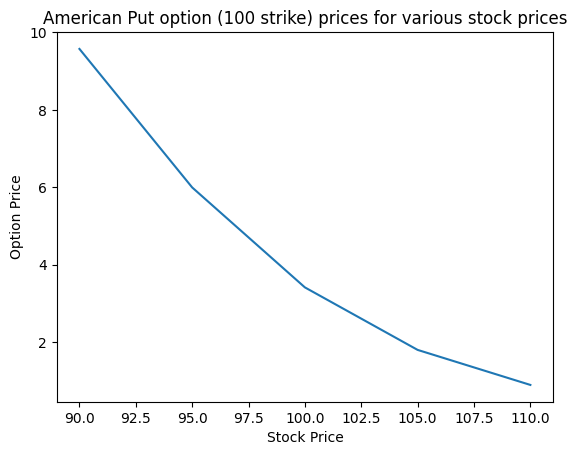

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(sp, put_prices)
plt.xlabel("Stock Price")
plt.ylabel("Option Price")
plt.title("American Put option (100 strike) prices for various stock prices")

In [ ]:
sp = [90, 95, 100, 105, 110]
call_prices = []
print("Strike\tCall Price")
for price in sp:
  np.random.seed(42)
  cp = bs_call_mc_american(100, price, 0.05, 0.20, 3/12, 90, 5000)
  call_prices.append(cp)
  print(f"{price}\t{cp:.2f}")

Strike	Call Price
90	11.75
95	7.77
100	4.60
105	2.39
110	1.04


Text(0.5, 1.0, 'American Call option prices for various strike prices')

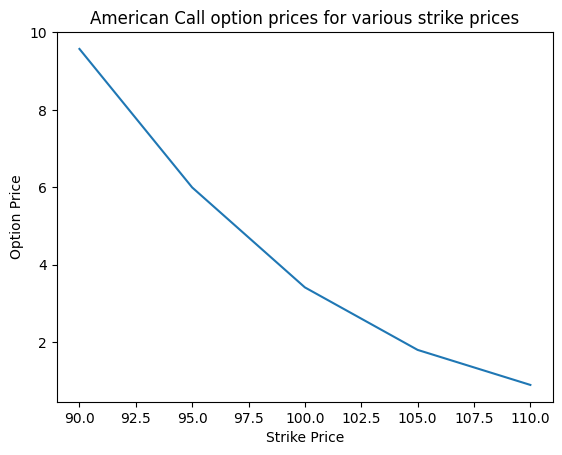

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(sp, put_prices)
plt.xlabel("Strike Price")
plt.ylabel("Option Price")
plt.title("American Call option prices for various strike prices")

Strike	Put Price
90	0.69
95	1.65
100	3.41
105	6.14
110	9.73


Text(0.5, 1.0, 'American Put option prices for various strike prices')

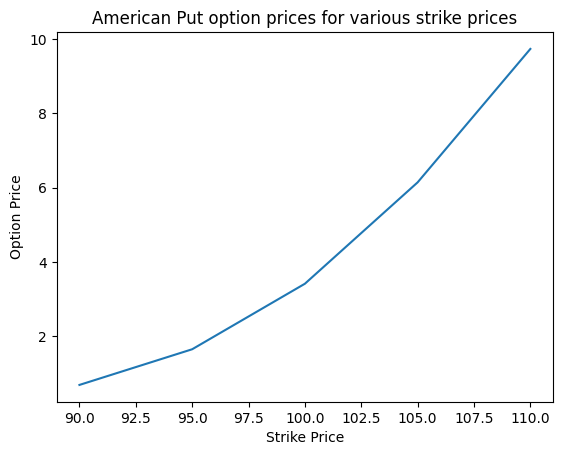

In [ ]:
sp = [90, 95, 100, 105, 110]
put_prices = []
print("Strike\tPut Price")
for price in sp:
  np.random.seed(42)
  cp = bs_put_mc_american(100, price, 0.05, 0.20, 3/12, 90, 5000)
  put_prices.append(cp)
  print(f"{price}\t{cp:.2f}")

import matplotlib.pyplot as plt 
plt.plot(sp, put_prices)
plt.xlabel("Strike Price")
plt.ylabel("Option Price")
plt.title("American Put option prices for various strike prices")

In [ ]:
option_price_greeks(100, 0.05, 0.20, 3/12, 110, "C")

Option price = 1.19
Delta = 0.2183
Gamma = 0.0295
Vega = 14.7370
Theta = -6.9265
Rho = 5.1586


In [ ]:
option_price_greeks(100, 0.05, 0.20, 3/12, 95, "P")

Option price = 1.53
Delta = -0.2457
Gamma = 0.0315
Vega = 15.7440
Theta = -4.9921
Rho = -6.5273


If we buy the above call and put options, we get a delta of 0.2183 - 0.2457 which works out to a delta of -0.0274.  This means that if we want to delta-hedge the portfolio, we should buy 0.0274 shares of stock.

If we buy the call and sell the put, we get a delta of 0.4640; this means that if we want do delta-hedge we should sell 0.4640 shares of stock.


In [15]:
import numpy as np

def bs_up_and_out_barrier(S, K, r, sigma, T, N, M, barrier):
    dt = T / N
    dS = S * (r * dt + sigma * np.sqrt(dt) * np.random.randn(M, N))
    S = S + np.cumsum(dS, axis=1)
    ST = S[:, -1]
    
    # Check if any path crosses the barrier
    crossed_barrier = np.any(S >= barrier, axis=1)
    
    # Calculate the payoff for each path
    data = np.where(crossed_barrier, 0, ST - K)
    
    average = np.sum(np.maximum(data, 0)) / float(M)

    return np.exp(-r * T) * average


In [16]:
np.random.seed(42)
print(f"The price of an ATM up and out barrier option is: {bs_up_and_out_barrier(120, 120, 0.06, 0.30, 8/12, 240, 50000, 141):.2f}")
print("Strike = S0 = 120, r=6%, sigma=30%, T=8 months, barrier level = 141")

The price of an ATM up and out barrier option is: 0.89
Strike = S0 = 120, r=6%, sigma=30%, T=8 months, barrier level = 141


In [22]:
def bs_up_and_in_barrier(S, K, r, sigma, T, N, M, barrier):
    dt = T / N
    dS = S * (r * dt + sigma * np.sqrt(dt) * np.random.randn(M, N))
    S = S + np.cumsum(dS, axis=1)
    ST = S[:, -1]
    
    # Check if any path crosses the barrier
    crossed_barrier = np.any(S >= barrier, axis=1)
    
    # Calculate the payoff for each path
    data = np.where(crossed_barrier, ST - K, 0)
    
    average = np.sum(np.maximum(data, 0)) / float(M)

    return np.exp(-r * T) * average

In [23]:
np.random.seed(42)
print(f"The price of an ATM up and in barrier option is: {bs_up_and_in_barrier(120, 120, 0.06, 0.30, 8/12, 240, 50000, 141):.2f}")
print("Strike = S0 = 120, r=6%, sigma=30%, T=8 months, barrier level = 141")

The price of an ATM up and in barrier option is: 12.68
Strike = S0 = 120, r=6%, sigma=30%, T=8 months, barrier level = 141


In [27]:
np.random.seed(42)
print(f"The price of a vanilla option is: {bs_call_mc(120, 120, 0.06, 0.30, 8/12, 240, 50000):.2f}")
print("Strike = S0 = 120, r=6%, sigma=30%, T=8 months")

The price of a vanilla option is: 13.57
Strike = S0 = 120, r=6%, sigma=30%, T=8 months


The price of an Up and Out option or Up and In is lower than the price of a vanilla option.  The UAO option contains an additional barrier level that, if breached by the underlying asset price, leads to the option being knocked out and losing its value. The presence of the barrier reduces the probability of the option being exercised and, as a result, lowers its price. The UAI option includes a barrier level that, when crossed by the underlying asset price, activates the option and allows it to gain value. The barrier acts as a condition for the option to be exercised; otherwise option is worthless.

The total price of the up and out, up and in options should equal the price of the vanilla option. This is because either the barrier is crossed or it isn't; so exactly one of the up and out and the up and in options will be active.  So the price of the vanilla option should be the sum of the prices of the up and in option and the up and out option.  